In [30]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os, yaml
import numpy as np
from matplotlib import cm

In [2]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [3]:
sites = ['extras','ganga_damodar','godavari','kali','kaveri','krishna','mahanadi','narmada','penner','sharavati','tapi']

In [4]:
sites_data = yaml.load(open(os.path.join(root,'bin','experiments-lowest.yaml'),'r'),Loader=yaml.SafeLoader)

In [5]:
ds_gconv = {}
for site in sites:
    #print (sites_data[site]['gconv'].split('-'))
    el = os.path.splitext(os.path.split(sites_data[site]['gconv'])[-1])[0][-2:]
    #el = str(int(el)+10)
    ds_gconv[site] = xr.load_dataset(os.path.join(root,'data','final_preds',f'{site}-gconv-{el}-preds.nc'))
ds_noconv = {}
for site in sites:
    el = os.path.splitext(os.path.split(sites_data[site]['no_gconv'])[-1])[0][-2:]
    ds_noconv[site] = xr.load_dataset(os.path.join(root,'data','final_preds',f'{site}-no_gconv-{el}-preds.nc'))

In [6]:
all_gconv = xr.merge([ds_gconv[site] for site in sites])

In [7]:
all_gconv

<xarray.Dataset>
Dimensions:     (date: 731, site: 66, step: 90)
Coordinates:
  * date        (date) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * site        (site) object 'almatti' 'balimela' ... 'yeldari' 'yeleru'
  * step        (step) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
Data variables:
    obs         (date, step, site) float64 nan 0.0 ... -0.001236 -0.003937
    sim-frozen  (date, step, site) float64 nan -0.00318 ... -0.001205 -0.005308
    sim-mean    (date, step, site) float64 nan -0.002365 ... -0.00155 -0.004234
    sim-std     (date, step, site) float64 nan 0.001436 ... 0.006923 0.01165
    ci-95+      (date, step, site) float64 nan 0.0005072 ... -0.001163 -0.003574
    ci-95-      (date, step, site) float64 nan -0.005238 ... -0.001938 -0.004895
    valid_time  (date, step) datetime64[ns] 2011-01-02 2011-01-03 ... 2021-03-31

In [8]:
select_sites = ['bhatghar', 'dudhganga', 'linganamakki'] # irshna x 2 sharavati

In [11]:
def norm_func(arr):
            return (arr - arr.min()) / (arr.max() - arr.min())  # 0 to 1

In [35]:
sharavati_data = xr.load_dataset(os.path.join(root,'data','data_sharavati.nc'))

In [10]:
krishna_data = xr.load_dataset(os.path.join(root,'data','data_krishna.nc'))

In [12]:
krishna_data

<xarray.Dataset>
Dimensions:                 (steps: 91, global_sites: 24, date: 4384)
Coordinates:
  * steps                   (steps) timedelta64[ns] 0 days 1 days ... 90 days
  * global_sites            (global_sites) object 'almatti' ... 'vanivilasa_s...
  * date                    (date) datetime64[ns] 2010-01-01 ... 2022-01-01
Data variables:
    seq_seq                 (global_sites, steps, date) float64 1.0 1.0 ... 1.0
    ones_ones               (global_sites, steps, date) float64 1.0 1.0 ... 1.0
    doy_sin                 (global_sites, steps, date) float64 0.01721 ... 1.0
    doy_cos                 (global_sites, steps, date) float64 0.9999 ... 0....
    tigge_t2m               (date, global_sites, steps) float64 293.3 ... nan
    tigge_tp                (date, global_sites, steps) float64 0.0 ... nan
    era5land_t2m            (steps, date, global_sites) float64 297.4 ... nan
    era5land_tp             (steps, date, global_sites) float64 4.361e-05 ......
    chirps_precip           (steps, date, global_sites) float64 0.004173 ... nan
    targets_WATER_VOLUME    (steps, global_sites, date) float64 2.587 ... nan
    targets_RESERVOIR_NAME  (steps, global_sites, date) object 'almatti' ... ''

In [14]:
krishna_data['targets_WATER_VOLUME'] = krishna_data['targets_WATER_VOLUME'].groupby("global_sites").map(norm_func)

In [36]:
sharavati_data['targets_WATER_VOLUME'] = sharavati_data['targets_WATER_VOLUME'].groupby("global_sites").map(norm_func)

In [18]:
krishna_data = krishna_data.rename({'steps':'step','global_sites':'site'})

In [37]:
sharavati_data = sharavati_data.rename({'steps':'step','global_sites':'site'})

In [9]:
all_gconv

<xarray.Dataset>
Dimensions:     (date: 731, site: 66, step: 90)
Coordinates:
  * date        (date) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * site        (site) object 'almatti' 'balimela' ... 'yeldari' 'yeleru'
  * step        (step) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
Data variables:
    obs         (date, step, site) float64 nan 0.0 ... -0.001236 -0.003937
    sim-frozen  (date, step, site) float64 nan -0.00318 ... -0.001205 -0.005308
    sim-mean    (date, step, site) float64 nan -0.002365 ... -0.00155 -0.004234
    sim-std     (date, step, site) float64 nan 0.001436 ... 0.006923 0.01165
    ci-95+      (date, step, site) float64 nan 0.0005072 ... -0.001163 -0.003574
    ci-95-      (date, step, site) float64 nan -0.005238 ... -0.001938 -0.004895
    valid_time  (date, step) datetime64[ns] 2011-01-02 2011-01-03 ... 2021-03-31

In [19]:
def revert_to_levels(
    data: xr.Dataset,
    preds: xr.Dataset,
    target_var: str,
) -> xr.Dataset:

    for var in ["obs", "sim", "sim-frozen", "sim-mean", "sim-std", "ci-95+", "ci-95-"]:
        if var in preds.keys():
            preds[var] = preds[var].cumsum(dim="step") + data[target_var].sel(
                {"date": data["date"].isin(preds["date"])}
            ).isel({"step": 0})

    return preds

In [38]:
preds_levels_krishna = revert_to_levels(
            data=krishna_data,
            preds=all_gconv.copy(deep=True),
            target_var='targets_WATER_VOLUME',
        )

In [39]:
preds_levels_sharaviti = revert_to_levels(
            data=sharavati_data,
            preds=all_gconv.copy(deep=True),
            target_var='targets_WATER_VOLUME',
        )

In [43]:
preds_levels = xr.merge([preds_levels_sharaviti.sel({'site':['linganamakki']}),preds_levels_krishna.sel({'site':select_sites[0:2]})])

In [28]:
date_idx = (all_gconv["date"] >= pd.to_datetime('2020-01-01')) & (
        all_gconv["date"] <= pd.to_datetime('2021-01-01')
    )

In [45]:
def _interpolate_1d(data):
    for var in list(data.keys()):
        if is_numeric_dtype(data[var]):
            data[var] = data[var].interpolate_na(
                dim="date", method="linear", limit=15
            )

    return data

In [47]:
from pandas.api.types import is_numeric_dtype

In [48]:
preds_levels = _interpolate_1d(preds_levels)

In [56]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

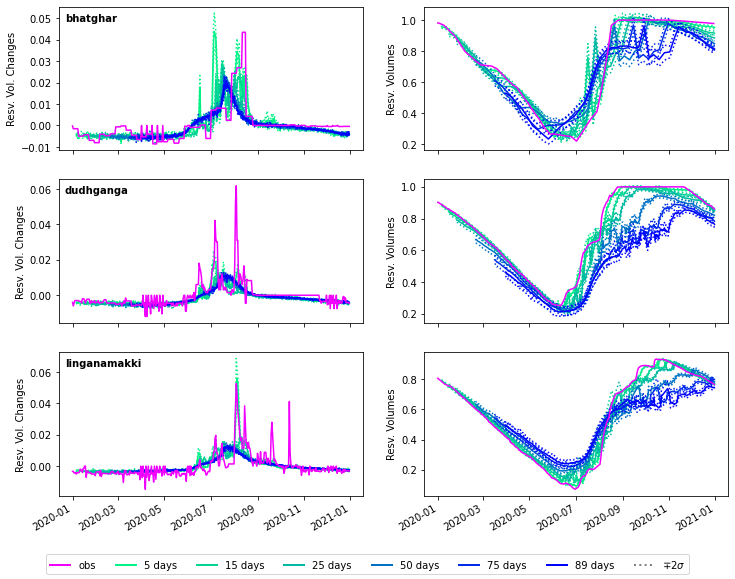

In [61]:
fig, axs = plt.subplots(3,2, figsize=(12,9), sharex=True)
cmap = cm.get_cmap("winter_r")

leg_items = [
    Line2D([0], [0], color='#f200ff', lw=2, label='obs')
]

for ii_s,site in enumerate(select_sites):

    for step in [5, 15, 25, 50, 75, 89]:
        # print (site, step)
        hexcolor = "#" + "".join(
            f"{int(el*255):02x}" for el in cmap(int(step / 90 * 255))[:3]
        )
        if ii_s==0:
            leg_items.append(
                Line2D([0], [0], color=hexcolor, lw=2, label=f'{step} days')
            )
        
        # plot main
        all_gconv.sel({"site": site, "step": step, "date": date_idx}).shift(
            date=step
        )['sim-mean'].plot(ax=axs[ii_s,0], c=hexcolor)

        # plot CI if available
        for dim in ['ci-95+','ci-95-']:
            all_gconv.sel({"site": site, "step": step, "date": date_idx}).shift(
                date=step
            )[dim].plot(ax=axs[ii_s,0], c=hexcolor, ls=":")

    all_gconv.sel({"site": site, "step": 0, "date": date_idx})["obs"].plot(
        ax=axs[ii_s,0], c="#f200ff"
    )
    
    
    for step in [5, 15, 25, 50, 75, 89]:
        # print (site, step)
        hexcolor = "#" + "".join(
            f"{int(el*255):02x}" for el in cmap(int(step / 90 * 255))[:3]
        )
        # plot main
        preds_levels.sel({"site": site, "step": step, "date": date_idx}).shift(
            date=step
        )['sim-mean'].plot(ax=axs[ii_s,1], c=hexcolor)

        # plot CI if available
        for dim in ['ci-95+','ci-95-']:
            preds_levels.sel({"site": site, "step": step, "date": date_idx}).shift(
                date=step
            )[dim].plot(ax=axs[ii_s,1], c=hexcolor, ls=":")

    preds_levels.sel({"site": site, "step": 0, "date": date_idx})["obs"].plot(
        ax=axs[ii_s,1], c="#f200ff"
    )
    
for ii in range(3):
    axs[ii,0].text(0.02,0.9,select_sites[ii], weight='bold', transform=axs[ii,0].transAxes)
    for jj in range(2):
        axs[ii,jj].set_title('')
        axs[ii,jj].set_xlabel('')
    axs[ii,0].set_ylabel('Resv. Vol. Changes')
    axs[ii,1].set_ylabel('Resv. Volumes')
    
leg_items.append(
    Line2D([0], [0], color='gray', lw=2, ls=':', label=f'$\mp$2$\sigma$')
)
    
fig.legend(handles=leg_items, ncol=len(leg_items), loc='lower center')
fig.savefig('./sample_predictions.pdf',bbox_inches='tight')

In [ ]:
cmap = cm.get_cmap("winter_r")
n_cols = 3
n_rows = ceil(len(preds["site"]) / n_cols) * len(test_chunks)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))
axs = axs.flatten()
_ii = 0
for chunk in test_chunks:
    date_idx = (preds["date"] >= pd.to_datetime(chunk[0])) & (
        preds["date"] <= pd.to_datetime(chunk[1])
    )
    for site in preds["site"].data:

        for step in [5, 15, 25, 50, 75, 89]:
            # print (site, step)
            hexcolor = "#" + "".join(
                f"{int(el*255):02x}" for el in cmap(int(step / 90 * 255))[:3]
            )
            # plot main
            preds.sel({"site": site, "step": step, "date": date_idx}).shift(
                date=step
            )[main_dim].plot(ax=axs[_ii], c=hexcolor)

            # plot CI if available
            if ci_dims is not None:
                for dim in ci_dims:
                    preds.sel({"site": site, "step": step, "date": date_idx}).shift(
                        date=step
                    )[dim].plot(ax=axs[_ii], c=hexcolor, ls=":")

        preds.sel({"site": site, "step": 0, "date": date_idx})["obs"].plot(
            ax=axs[_ii], c="#f200ff"
        )
        _ii += 1


In [ ]:
def plot_test_preds(
    filepath: Path,
    preds: xr.Dataset,
    test_chunks: List[List[str]],
    site_dim: Optional[str] = "site",
    main_dim: Optional[str] = "sim",
    ci_dims: Optional[List[str]] = None,
):

    cmap = cm.get_cmap("winter_r")
    n_cols = 3
    n_rows = ceil(len(preds["site"]) / n_cols) * len(test_chunks)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))
    axs = axs.flatten()
    _ii = 0
    for chunk in test_chunks:
        date_idx = (preds["date"] >= pd.to_datetime(chunk[0])) & (
            preds["date"] <= pd.to_datetime(chunk[1])
        )
        for site in preds["site"].data:

            for step in [5, 15, 25, 50, 75, 89]:
                # print (site, step)
                hexcolor = "#" + "".join(
                    f"{int(el*255):02x}" for el in cmap(int(step / 90 * 255))[:3]
                )
                # plot main
                preds.sel({"site": site, "step": step, "date": date_idx}).shift(
                    date=step
                )[main_dim].plot(ax=axs[_ii], c=hexcolor)

                # plot CI if available
                if ci_dims is not None:
                    for dim in ci_dims:
                        preds.sel({"site": site, "step": step, "date": date_idx}).shift(
                            date=step
                        )[dim].plot(ax=axs[_ii], c=hexcolor, ls=":")

            preds.sel({"site": site, "step": 0, "date": date_idx})["obs"].plot(
                ax=axs[_ii], c="#f200ff"
            )
            _ii += 1

    fig.savefig(filepath)
    plt.close("all")